In [1]:
import os
from mayavi import mlab
import numpy as np
import scipy.io
import img_pipe
import img_pipe.SupplementalFiles.FS_colorLUT as FS_colorLUT
from img_pipe.plotting.ctmr_brain_plot import ctmr_gauss_plot
%matplotlib inline
%autoreload 2


print 'Subjects directory:', os.environ['SUBJECTS_DIR']
print 'Freesurfer directory:', os.environ['FREESURFER_HOME']

hem='lh'
patient=img_pipe.freeCoG(subj='EC108', hem=hem)
#patient.plot_brain(showfig=False, screenshot=True)

Subjects directory: /Users/bendichter/dura_mount/data_store2/imaging/subjects
Freesurfer directory: /Applications/freesurfer


100%|██████████| 60/60 [00:08<00:00,  3.38it/s] 


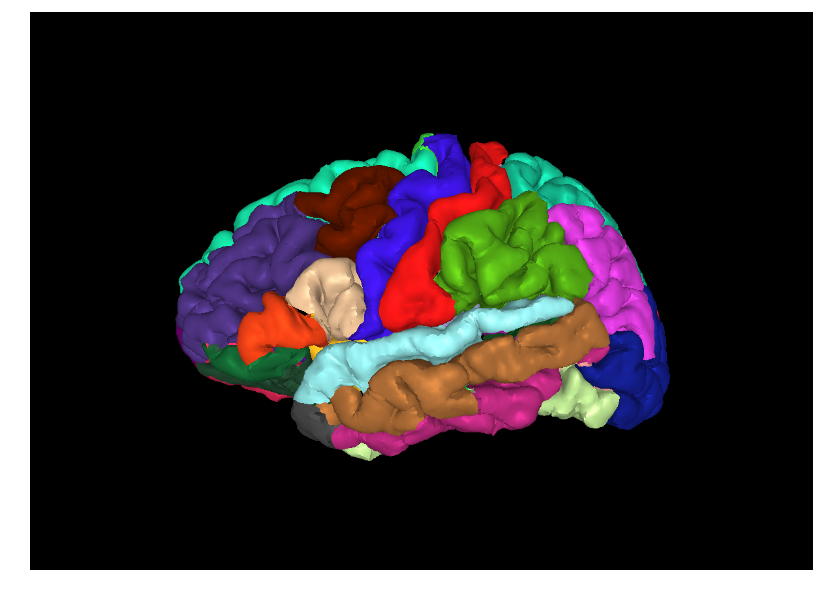

In [4]:
patient.plot_all_surface_rois(screenshot=True)


In [12]:
tuple(color)

(0.29411764705882354, 0.19607843137254902, 0.49019607843137253)

In [7]:
FS_colorLUT.get_lut()['ctx-'+hem+'-'+rois[-1]]

[75.0, 50.0, 125.0]

In [16]:
roi = rois[-1]
mesh = patient.make_roi_mesh(roi,[roi], save=False)
color = np.array(FS_colorLUT.get_lut()['ctx-'+hem+'-'+roi])/255.
mesh, mlab = ctmr_gauss_plot(mesh['tri'], mesh['vert'], color=color)
mlab.show()

In [49]:
FS_colorLUT.get_lut()

{'Right-Internal-IliacV': [80.0, 200.0, 255.0],
 'ctx_rh_S_oc-temp_lat': [221.0, 140.0, 20.0],
 'wm-lh-S_temporal_superior': [223.0, 220.0, 60.0],
 'ctx-lh-premotor': [130.0, 100.0, 165.0],
 'Unknown': [0.0, 0.0, 0.0],
 'ctx-rh-supramarginal': [80.0, 160.0, 20.0],
 'ctx-rh-precentral': [60.0, 20.0, 220.0],
 'wm_rh_Lat_Fis-ant-Vertical': [61.0, 20.0, 60.0],
 'wm_rh_S_parieto_occipital': [101.0, 100.0, 180.0],
 'wm-lh-entorhinal': [35.0, 235.0, 245.0],
 'ctx-rh-S_precentral-Superior-part': [21.0, 20.0, 200.0],
 'Right-Internal-IliacA': [255.0, 0.0, 255.0],
 'wm-lh-G_subcentral': [60.0, 20.0, 220.0],
 'Thalamus-mediodorsal': [121.0, 184.0, 220.0],
 'wm-rh-caudalanteriorcingulate': [130.0, 155.0, 95.0],
 'ctx-lh-Lat_Fissure-ant_sgt-ramus_horizontal': [61.0, 20.0, 220.0],
 'wm-rh-G_subcentral': [60.0, 20.0, 220.0],
 'Cbm_Right_CrusI_mid': [255.0, 215.0, 0.0],
 'Right-Subcortical-Gray-Matter': [122.0, 186.0, 220.0],
 'wm-lh-G_rectus': [20.0, 60.0, 100.0],
 'IPL_PF_r': [100.0, 5.0, 200.0],
 '

In [ ]:
def plot_all_surface_rois(hem=None, bgcolor=(0, 0, 0), size=(1200, 900), **kwargs):
    mlab.figure(fgcolor=(0, 0, 0), bgcolor=bgcolor, size=size)
    rois = patient.get_rois()
    for roi in tqdm(rois):
        try:
            mesh = patient.make_roi_mesh(roi,[roi], save=False)
            color = np.array(FS_colorLUT.get_lut()['ctx-'+hem+'-'+roi])/255.
            mesh, mlab = ctmr_gauss_plot(mesh['tri'], mesh['vert'], color=color, new_fig=False, **kwargs)
        except:
            pass
        
mlab.show()


In [50]:
mlab.figure(fgcolor=(0, 0, 0), bgcolor=(0, 0, 0), size=(1200,900))
rois = patient.get_rois()
for roi in tqdm(rois):
    try:
        mesh = patient.make_roi_mesh(roi,[roi], save=False)
        try:
            color = np.array(FS_colorLUT.get_lut()['ctx-'+hem+'-'+roi])/255.
        except:
            color = np.array(FS_colorLUT.get_lut()['wm-'+hem+'-'+roi])/255.
        mesh, mlab = ctmr_gauss_plot(mesh['tri'], mesh['vert'], color=color, new_fig=False)
    except:
        pass
        
mlab.show()

100%|██████████| 60/60 [00:08<00:00,  3.29it/s]


In [ ]:
mesh=patient.make_roi_mesh('lateralorbitofrontal',['lateralorbitofrontal'], save=False)
mesh['tri']
mesh['vert']
mesh,mlab=ctmr_gauss_plot(mesh['tri'],mesh['vert'])
mlab.show()

In [34]:
all_rois.append(patient.make_roi_mesh(roi, [roi]))

IOError: [Errno 13] Permission denied: '/Users/bendichter/dura_mount/data_store2/imaging/subjects/EC108/Meshes/EC108_lh_rostralmiddlefrontal.mat'